In [1]:
import numpy as np
from scipy.stats import chi2, kstest, binom, norm
from tools.helpers import Progress

In [2]:
SAMPLES = 100000
DIM = 10

In [3]:
def gen_samples(d, samples, projection):
    return (projection(np.random.randn(d)) for _ in Progress(range(samples)))

def stat_dim(d, samples, projection):
    samples = gen_samples(d, samples, projection)
    return np.sum(np.linalg.norm(x)**2 for x in samples) / SAMPLES

def test(d, samples, projection, pmf, cdf):
    y = [np.linalg.norm(x)**2 for x in gen_samples(d, samples, projection)]
    print(np.mean(y))
    
    pl.hist(y, bins=100, normed=True)
    xs = np.linspace(*pl.xlim(), 1000)
    pl.plot(xs, pmf(xs))
    pl.show()
    
    print(kstest(y, cdf))
    
def model_to_f(model):
    pdf = lambda x: sum(w * chi2(k).pdf(x) for k, w in model.items() if k > 0)
    cdf = lambda x: sum(w * chi2(k).cdf(x) for k, w in model.items() if k > 0) \
            + model.get(0, 0)
    return pdf, cdf

### No projection

-> Stat. Dimension of space = dimension of space

 98% ( 98735 of 100000) |################ | Elapsed Time: 0:00:01 ETA:  0:00:00

10.0071310685


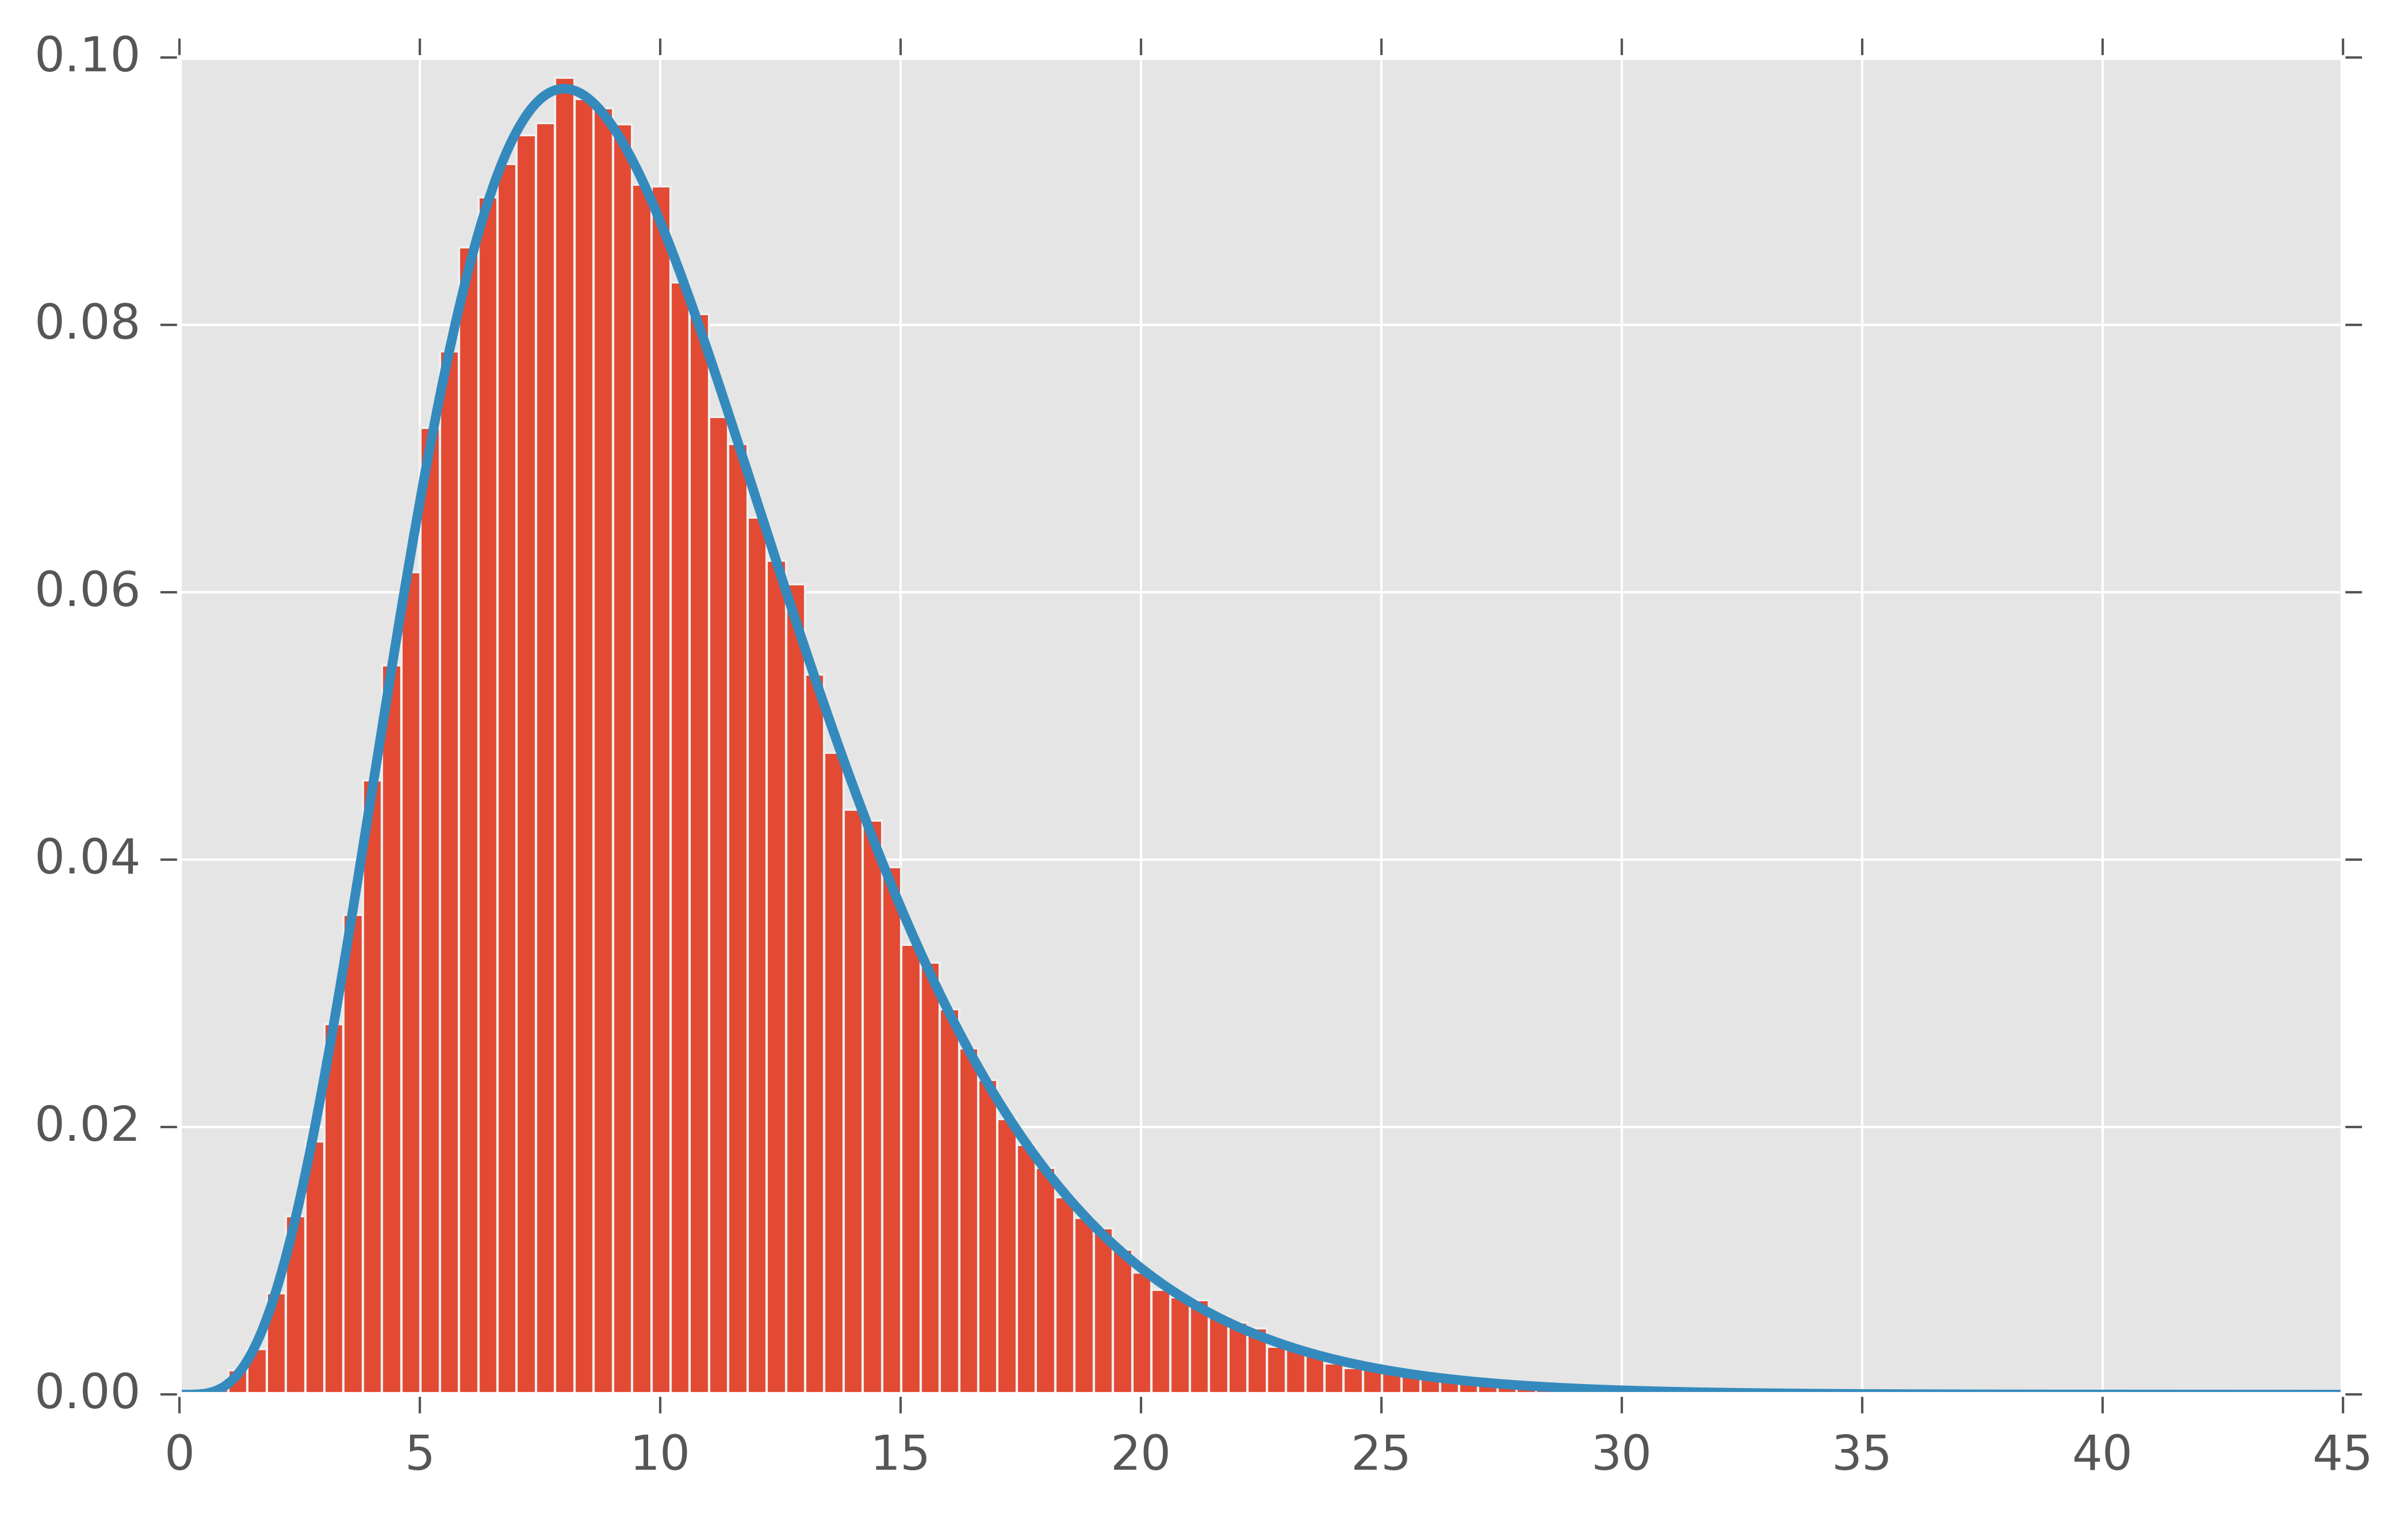

KstestResult(statistic=0.0018104272272187472, pvalue=0.89846121456796946)


In [4]:
test(DIM, SAMPLES, lambda x: x, chi2(DIM).pdf, chi2(DIM).cdf)

 98% ( 98735 of 100000) |################ | Elapsed Time: 0:00:01 ETA:  0:00:00

10.0063228283


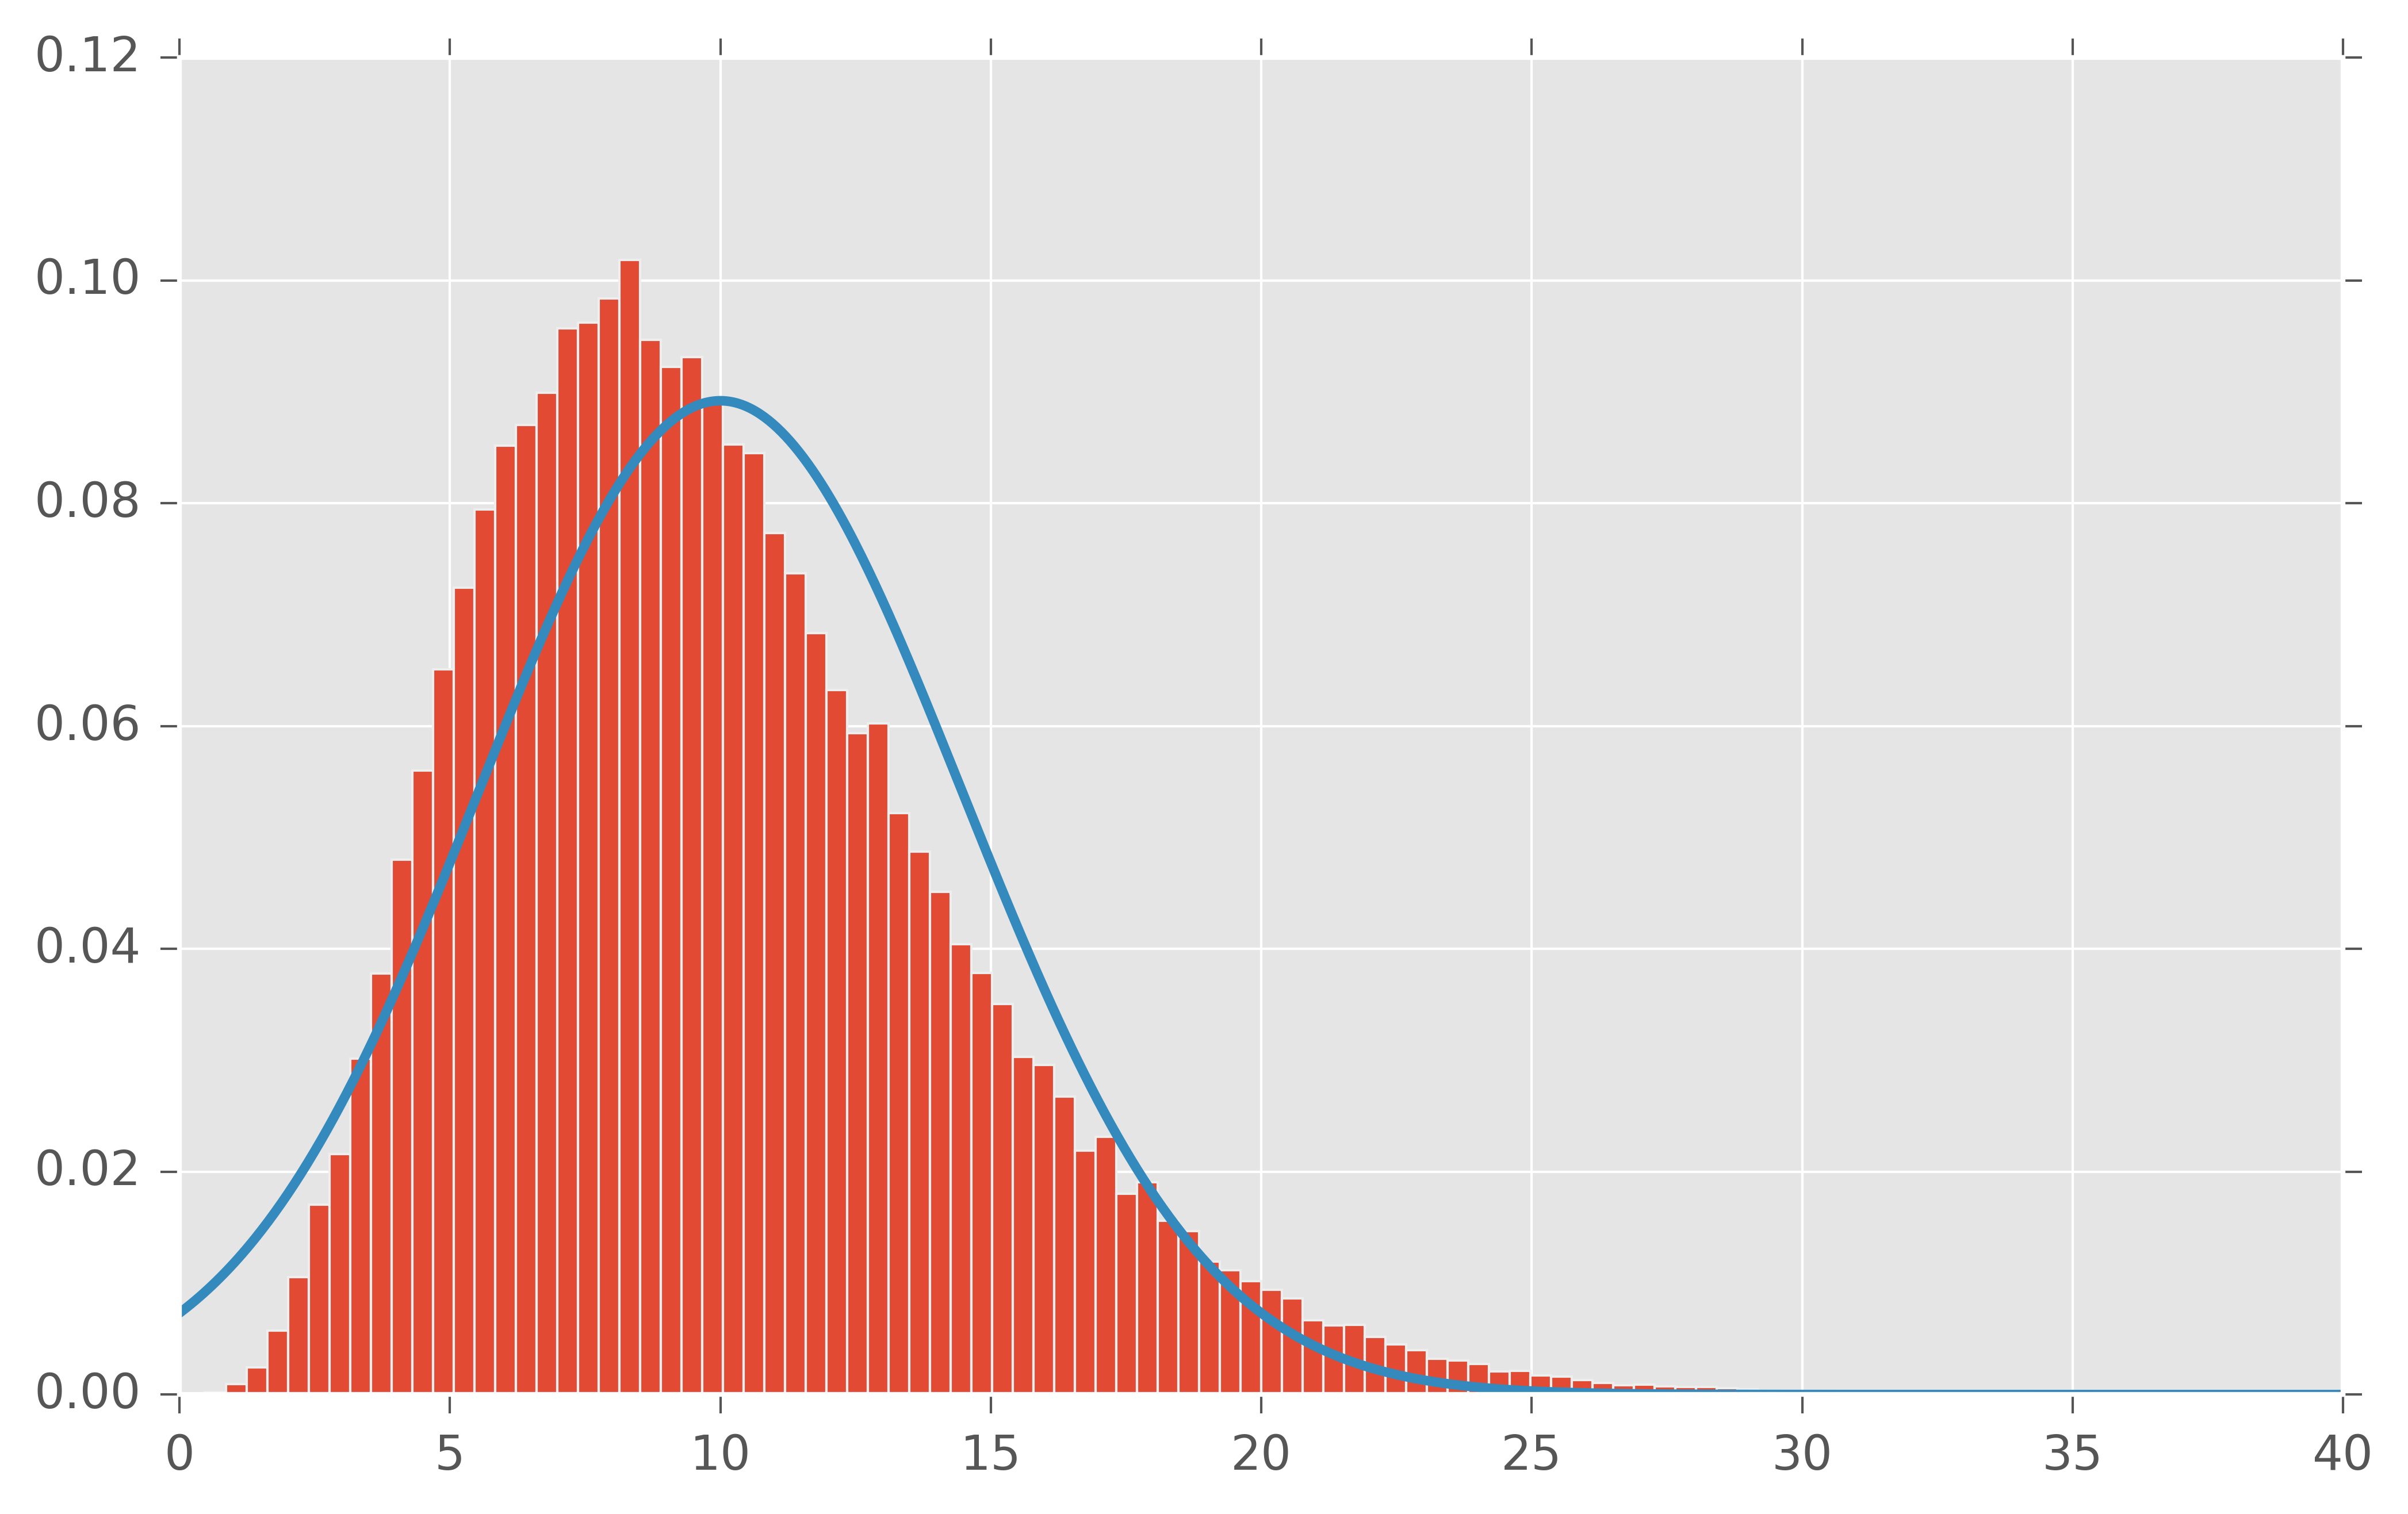

KstestResult(statistic=0.059564711923776326, pvalue=1.3476664082424093e-308)


In [5]:
dist = norm(DIM, np.sqrt(2 * DIM))

test(DIM, SAMPLES, lambda x: x, dist.pdf, dist.cdf)

### Halfspace

 98% ( 98735 of 100000) |################ | Elapsed Time: 0:00:01 ETA:  0:00:00

8.98516412385


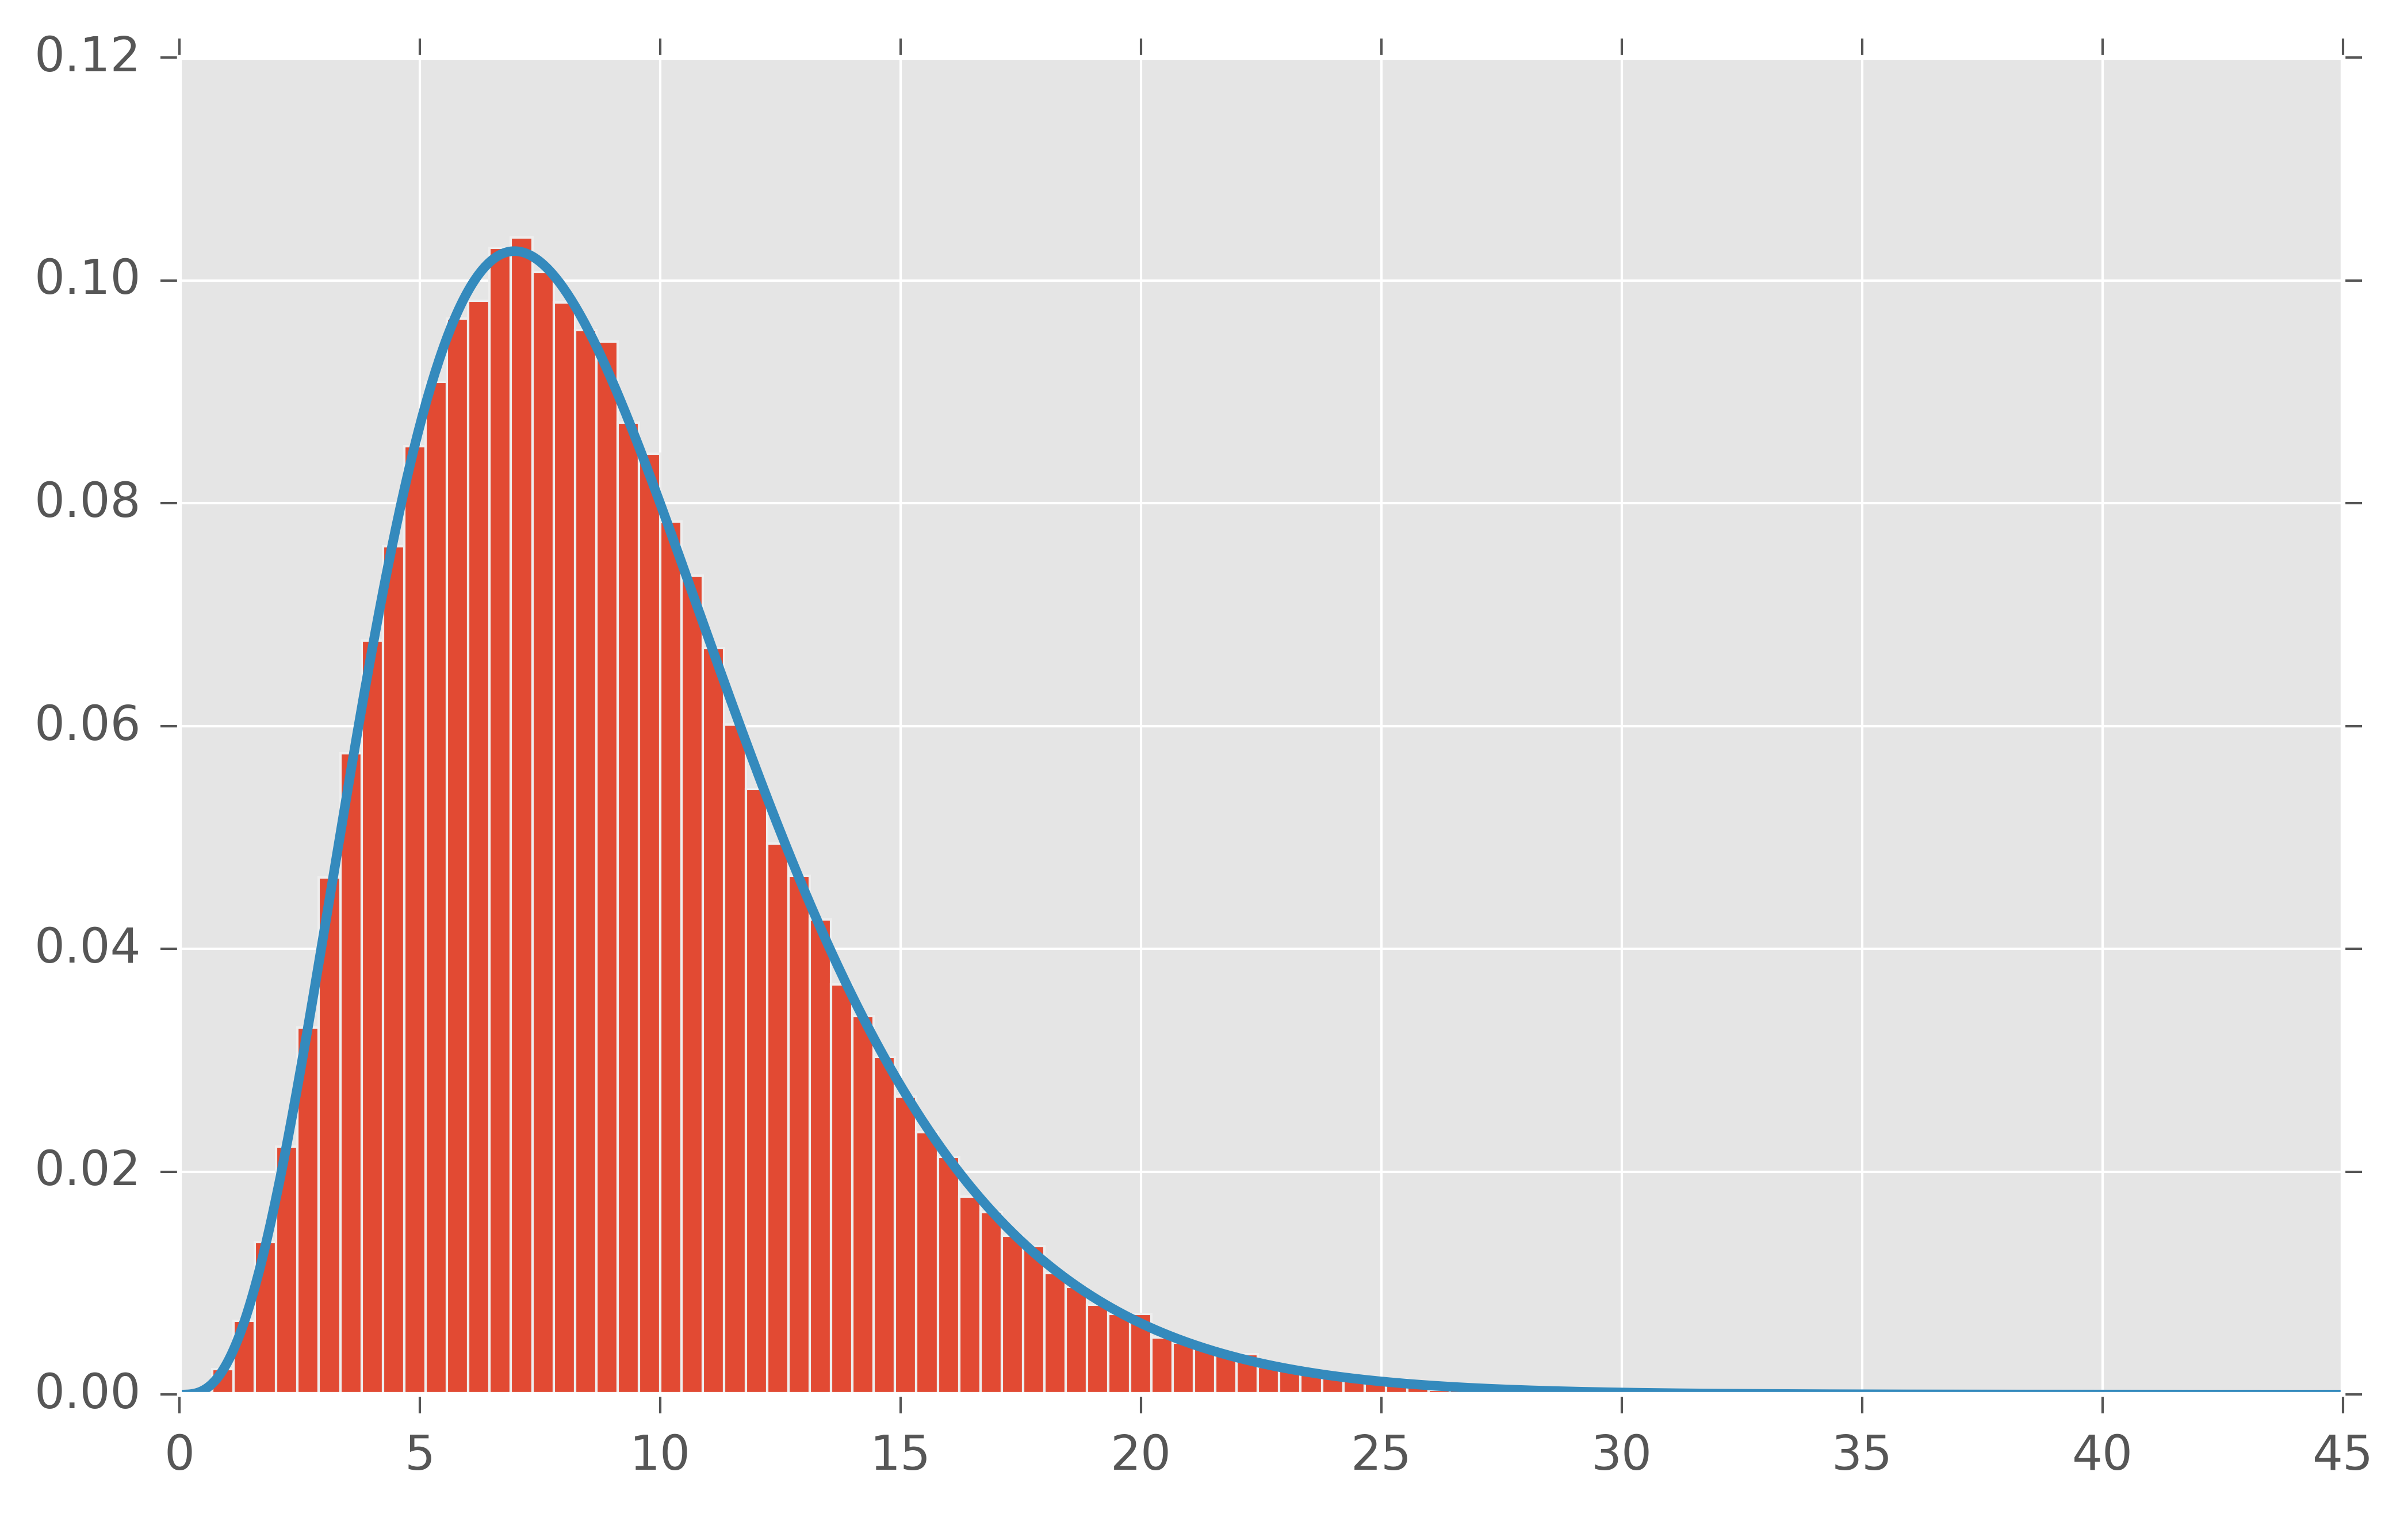

KstestResult(statistic=0.0031205351140628501, pvalue=0.28441924722712897)


In [7]:
def hs_proj(x, cd=2):
    for i in range(cd):
        x[i] = 0 if x[i] < 0 else x[i]
    return x

pdf, cdf = model_to_f({DIM: .25, DIM - 1: .5, DIM - 2: .25})
test(DIM, SAMPLES, hs_proj, pdf, cdf)

### Subspace

100% (100000 of 100000) |#################| Elapsed Time: 0:00:01 Time: 0:00:01


10.0008543385


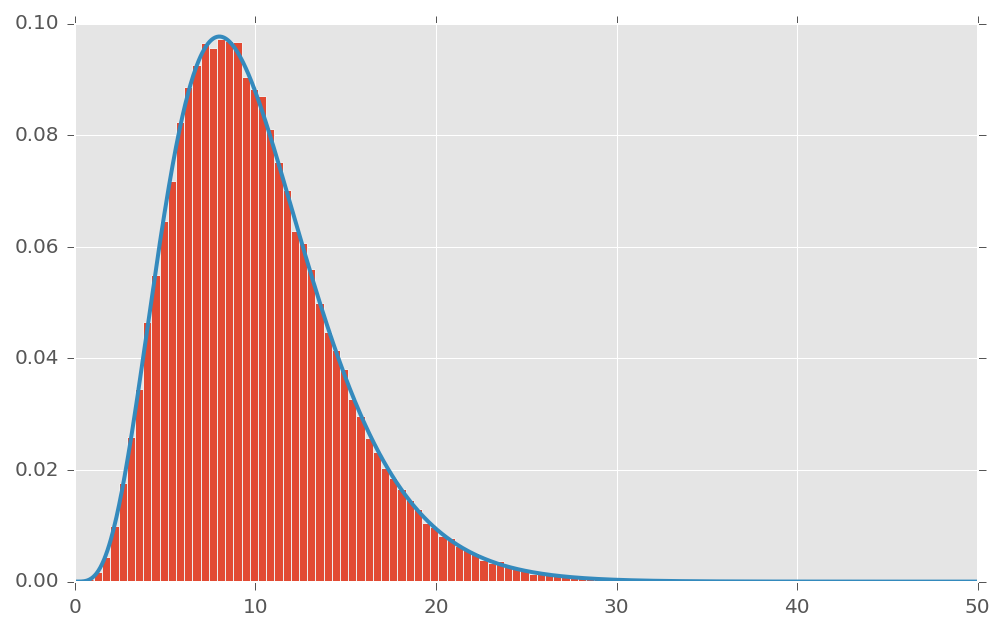

KstestResult(statistic=0.0017418563515274599, pvalue=0.92198749572585847)


In [6]:
sel = np.zeros(DIM)
sel[:10] = 1.
test(DIM, SAMPLES, lambda x: x * sel, chi2(10).pdf, chi2(10).cdf)

### Pos. Octant

In [8]:
from scipy.special import binom

### not sure if this is right...

 98% ( 98735 of 100000) |################ | Elapsed Time: 0:00:01 ETA:  0:00:00

5.01534142693


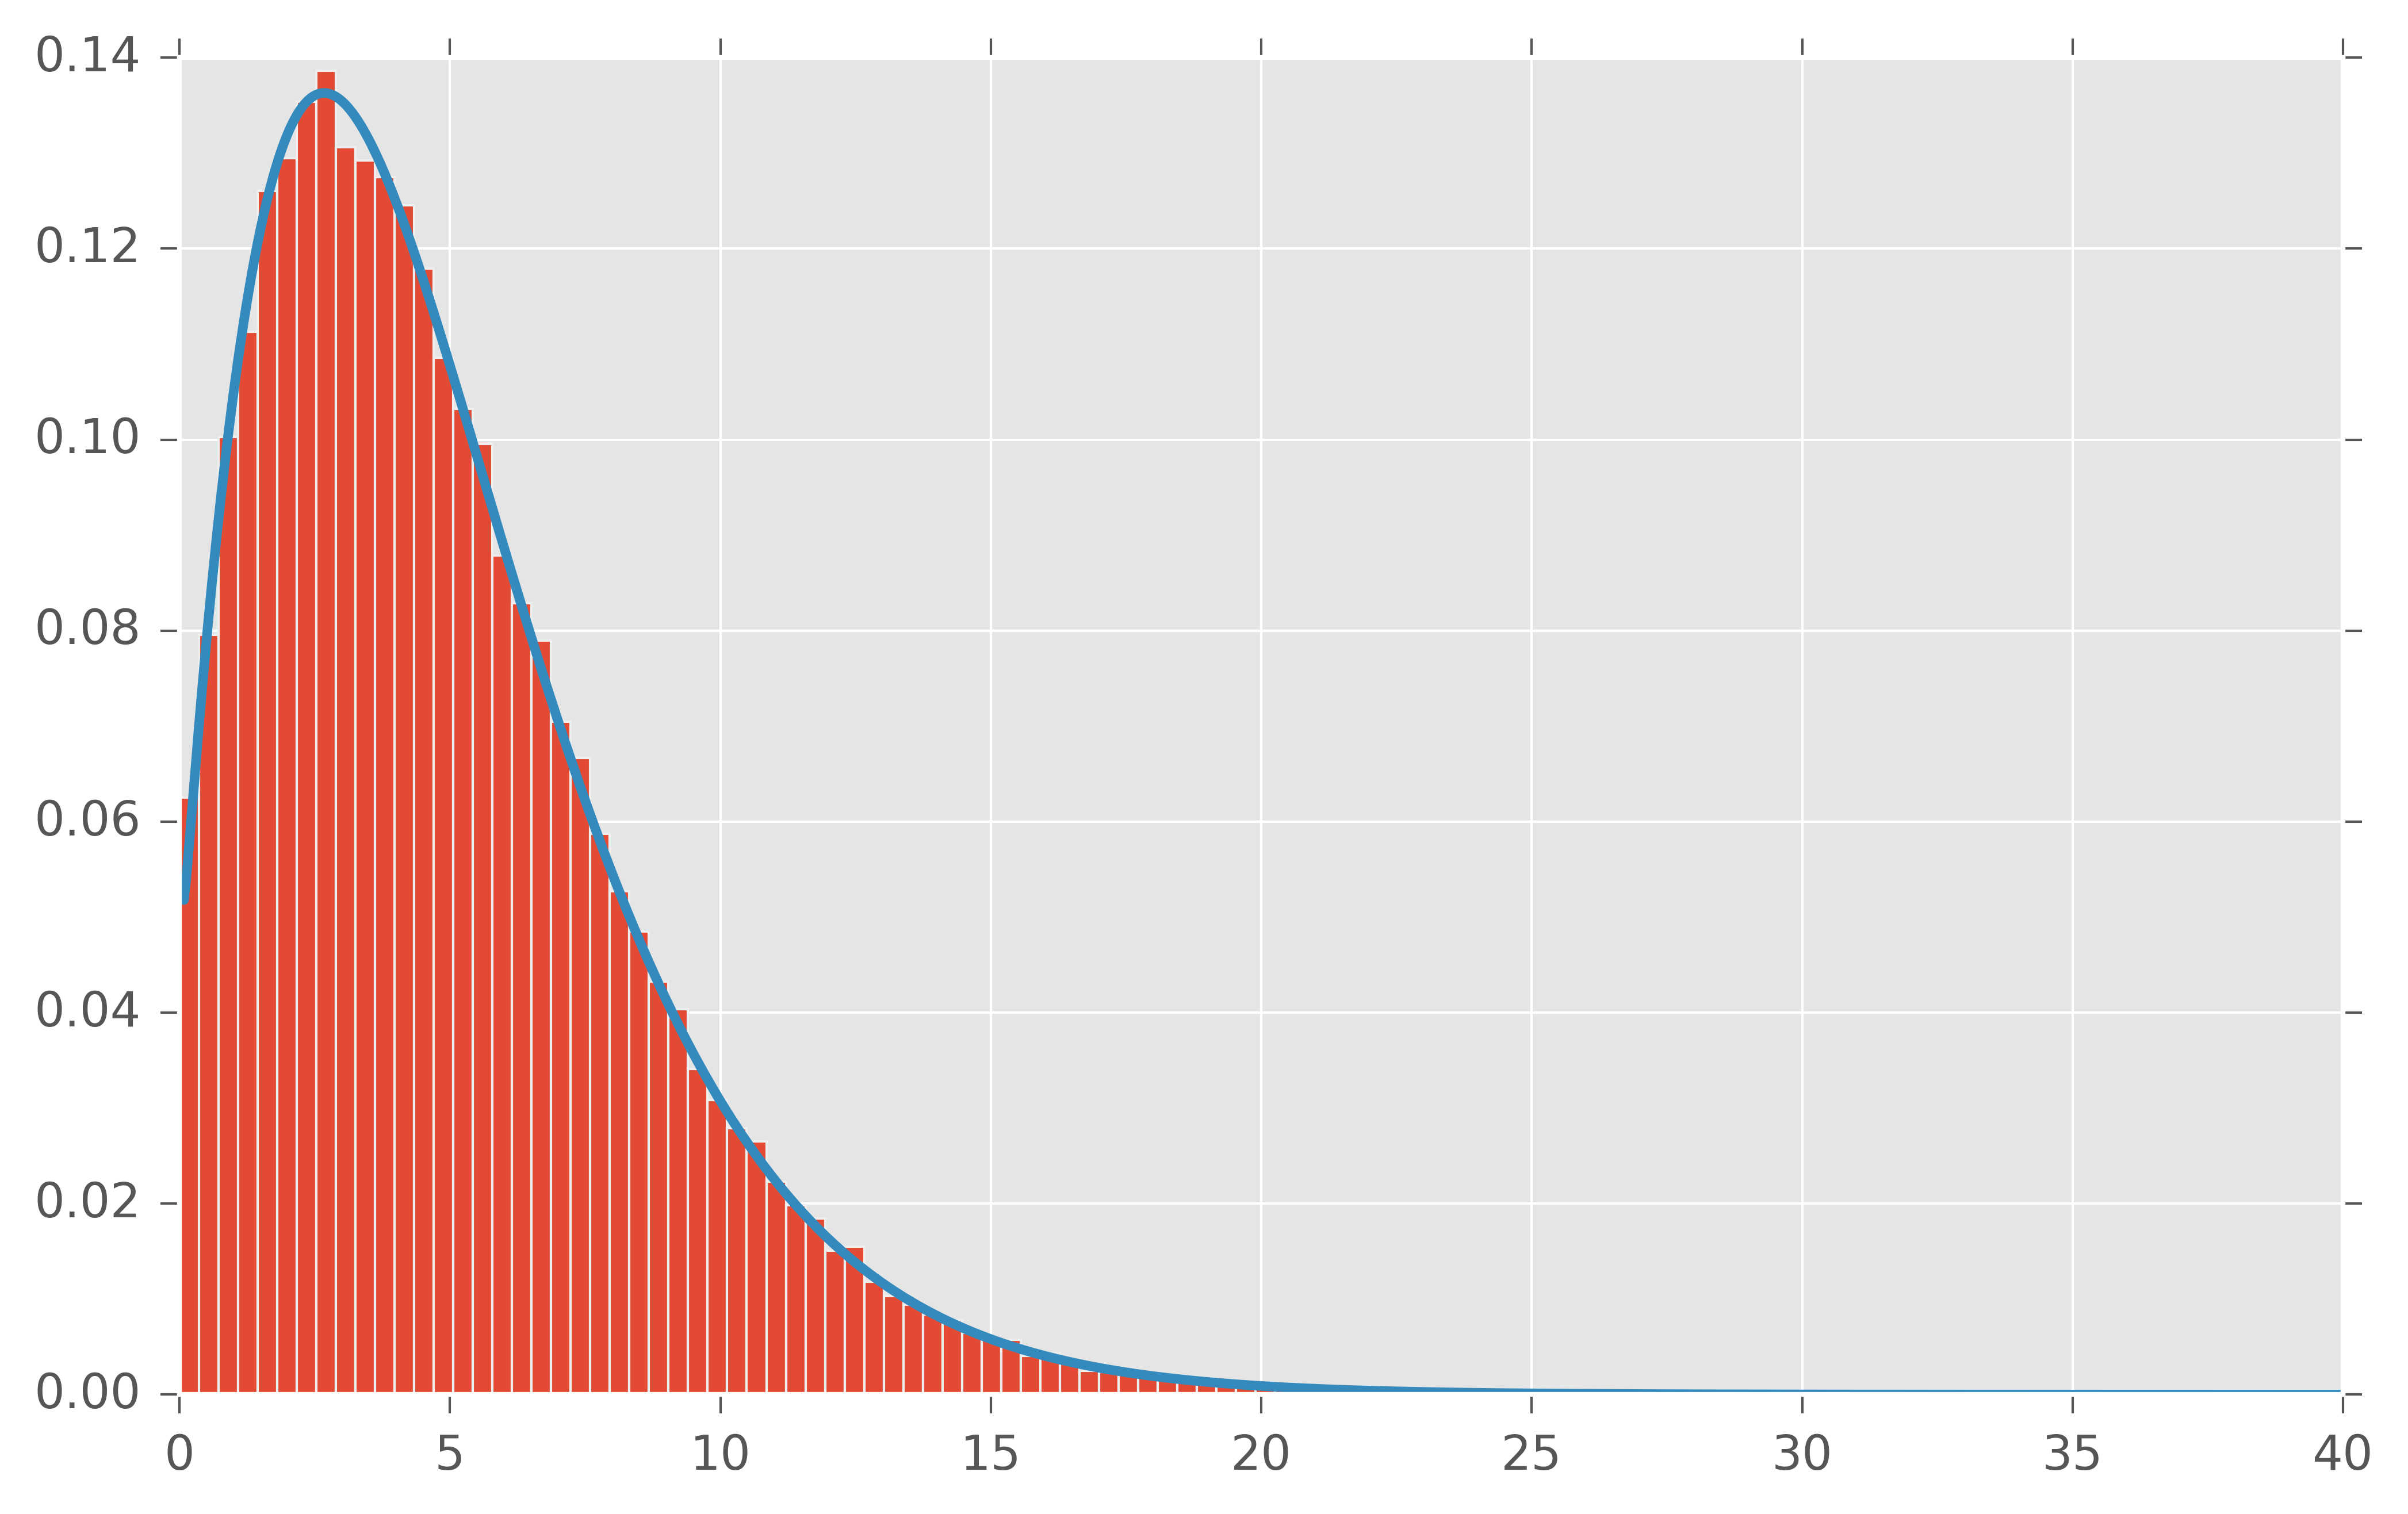

KstestResult(statistic=0.0040884664850799335, pvalue=0.07065060915022528)


In [13]:
ws = np.array([binom(DIM, k) / 2**DIM for k in range(DIM + 1)])
indices = list(enumerate(ws))

pdf = lambda x: sum(w * chi2(k).pdf(x) for k, w in indices[1:])
cdf = lambda x: sum(w * chi2(k).cdf(x) for k, w in indices[1:]) + ws[0]

test(DIM, SAMPLES, lambda x: x*(x > 0), pdf, cdf)

<img  src="G0VU1KKCICWJTDAC8WKSP8BBR7JP40RR.png"/>